## Phase 4.42.0 APPENDIX

# Convolutional Neural Networks

*Reference: <a href='https://github.com/tensorflow/docs/tree/master/site/en/tutorials'>Tensorflow GitHub</a>*

## Objectives
- Describe the unique types of layers used in Convolutional Nets
- Use Tensorflow to build CNNs
- Evaluating CNNs

# What are CNNs?

From <a href='https://en.wikipedia.org/wiki/Convolutional_neural_network'>Wikipedia</a>:

> "CNNs are **regularized versions** of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to **overfitting** data. Typical ways of regularization include adding some form of magnitude measurement of weights to the loss function. However, **CNNs take a different approach towards regularization:** they take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns."
>
>
> "Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex. Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field."

## Convoluting and Pooling

The two distinctive types of layer inside of a typical CNN (and there may be several of each in a single network) are **convolutional** and **pooling** layers. Let's look at each in turn.


### Convolution
- Convolutional nets employ <a href='https://en.wikipedia.org/wiki/Convolution'>convolutions</a>, which are a certain kind of transformation. 
- In the context of neural networks processing images, this can be thought of as sliding a filter (of weights) over the image matrix to produce a new matrix of values.
- The relative smallness of the filter means both that there will be relatively few parameters to learn and that the values representing certain areas of the image will be affected only by the values of *nearby areas*. 
    - This helps the network in **feature detection**. 

> *Resource & Visuals: https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/*

3x3 image and a 2x2 filter:


$\begin{bmatrix}
a & b & c \\
d & e & g \\
h & j & k
\end{bmatrix} *
\begin{bmatrix}
f_1 & f_2 \\
f_3 & f_4
\end{bmatrix} =
\begin{bmatrix}
f_1a + f_2b + f_3d + f_4e & f_1b + f_2c + f_3e + f_4g \\
f_1d + f_2e + f_3h + f_4j & f_1e + f_2g + f_3j + f_4k
\end{bmatrix}$.


- *Line up the filter with the image,*
- *multiply all the corresponding pairs,*
- *add up those products.* 


- *Repeat for all positions of the filter as allowed by <a href='https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/'>the stride and the padding</a>. The relative position of the filter to the image will tell you which entry in the resultant matrix you're filling in.*

Horizontal edge detection filter:

$\begin{bmatrix}
10 & 10 & 10 \\
0 & 0 & 0 \\
-10 & -10 & -10
\end{bmatrix}$

Suppose we apply this filter to (i.e. *convolve*) an image with a clear horizontal edge, such as this one:

$\begin{bmatrix}
200 & 200 & 200 & 200 & 200 \\
200 & 200 & 200 & 200 & 200 \\
200 & 200 & 200 & 200 & 200 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0
\end{bmatrix}$

---

Resulting in a *highlighted* horizontal edge:

$\begin{bmatrix}
0 & 0 & 0 \\
6000 & 6000 & 6000 \\
6000 & 6000 & 6000 \\
0 & 0 & 0
\end{bmatrix}$

### Pooling
- The main goal in inserting a *pooling layer* is to reduce dimensionality, which helps to reduce both network computation and model overfitting. 
- This is generally a matter of reducing a matrix or tensor of values to some smaller size, and the most common way of doing this is by partitioning the large matrix into $n \times n$ blocks and then replacing each with the largest value in the block. 
    - Hence: "*MaxPooling*".

> [***From TensorFlow***]
>
> *This tutorial demonstrates training a simple <a href='https://developers.google.com/machine-learning/glossary/#convolutional_neural_network'>Convolutional Neural Network</a> (CNN) to classify MNIST digits. This simple network will achieve over 99% accuracy on the MNIST test set. Because this tutorial uses the <a href='https://www.tensorflow.org/guide/keras'>Keras Sequential API</a>, creating and training our model will take just a few lines of code.*
>
> *Note: CNNs train faster with a GPU. If you are running this notebook with Colab, you can enable the free GPU via **Edit -> Notebook settings -> Hardware accelerator -> GPU**.*

# Interactive Visualization

> *https://www.cs.ryerson.ca/~aharley/vis/conv/*

# Demonstration

## Obtain Data

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models

In [2]:
# Load data.
((train_images, train_labels), 
(test_images, test_labels)) = datasets.mnist.load_data()

In [3]:
# Checking shapes.
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

## Preprocessing

In [4]:
# Needing to pass in a 3-dimensional image into CovNet.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [5]:
# Normalize pixel values to be between 0 and 1.
train_images, test_images = train_images / 255, test_images / 255

## Create the Convolutional Base

> *The 6 lines of code below define the convolutional base using a common pattern: a stack of <a href='https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D'>Conv2D</a> and <a href='https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D'>MaxPooling2D</a> layers.*
> 
> - *As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size.*
>    - *If you are new to color channels, MNIST has one (because the images are grayscale), whereas a color image has three (R,G,B).* 
> - *In this example, we will configure our CNN to process inputs of shape (28, 28, 1), which is the format of MNIST images. We do this by passing the argument `input_shape` to our first layer.*

In [6]:
train_images[0].shape

(28, 28, 1)

In [7]:
# Creating a model.
model = models.Sequential()

# Input layer with `input_shape` parameter.
model.add(
    layers.Conv2D(
        32, 
        (3, 3), 
        activation='relu', 
        input_shape=train_images[0].shape,
        padding='same')
    )
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

- Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 
- The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). 
- Typically,  as the width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer.

## Adding Dense Layers
- To complete our model, we will feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. 
- Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. 
- First, we will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. 
- MNIST has 10 output classes, so we use a final Dense layer with 10 outputs and a softmax activation.

In [8]:
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=2, batch_size=64)

Epoch 1/2
938/938 [==============================] - 31s 32ms/step - loss: 0.4589 - accuracy: 0.8645
Epoch 2/2
938/938 [==============================] - 30s 32ms/step - loss: 0.0541 - accuracy: 0.9826


## Evaluating the Model

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Loss\n\t{test_loss}\nAccuracy\n\t{test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9882
Loss
	0.03418765589594841
Accuracy
	0.9882000088691711


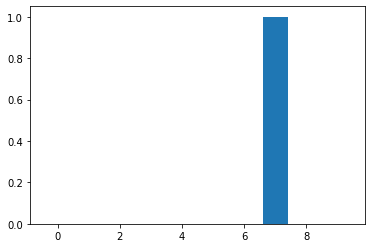

In [12]:
# Show prediction probabilities.
plt.bar(
    range(10), 
    (model.predict(test_images[0].reshape(1, 28, 28, 1))).flatten()
    );

In [15]:
model.predict(test_images[0].reshape(1, 28, 28, 1))

array([[6.4837273e-09, 1.0157312e-08, 2.0635507e-06, 1.7722119e-08,
        2.8945049e-11, 6.6747297e-10, 1.2016448e-13, 9.9999738e-01,
        1.3660280e-09, 5.9587353e-07]], dtype=float32)

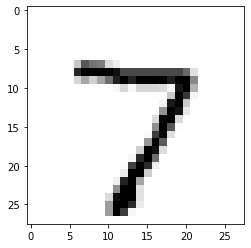

In [13]:
# Show actual image.
plt.imshow(test_images[0], cmap='Greys');

# Common Image Processing / Augmentation

The `ImageDataGenerator` is commonly used to bolster and enhance your training images by rotating and shifting

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
ImageDataGenerator()

```
Generate batches of tensor image data with real-time data augmentation.

 The data will be looped over (in batches).
```

In [18]:
# Create data generator.
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [19]:
# datagen.fit(train_images)

*Example:*
<img src='./images/cat_data_augmentation.png'>

### Notes:
#### Flow / Flow from DataFrame
- If the data is loaded into memory, you can use `.flow()` or `.flow_from_dataframe()` to access it:

> ```python
> train_generator = datagen.flow(train_images, train_labels, batch_size=32)
> 
> model.fit(
>     train_generator,
>     steps_per_epoch=train_images.shape[0] // 32, 
>     epochs=10
>     )
> ```
#### Flow from Directory
- If the data is in a directory and not loaded into memory, you can use `.flow_from_directory()` to access it:

> ```
> train_generator = train_datagen.flow_from_directory('data/train')
> validation_generator = test_datagen.flow_from_directory('data/validation')
> 
> model.fit(
>         train_generator,
>         epochs=50,
>         validation_data=validation_generator,
>         validation_steps=800)
> ```

> **directory:**
> 
> **string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator.**

In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```